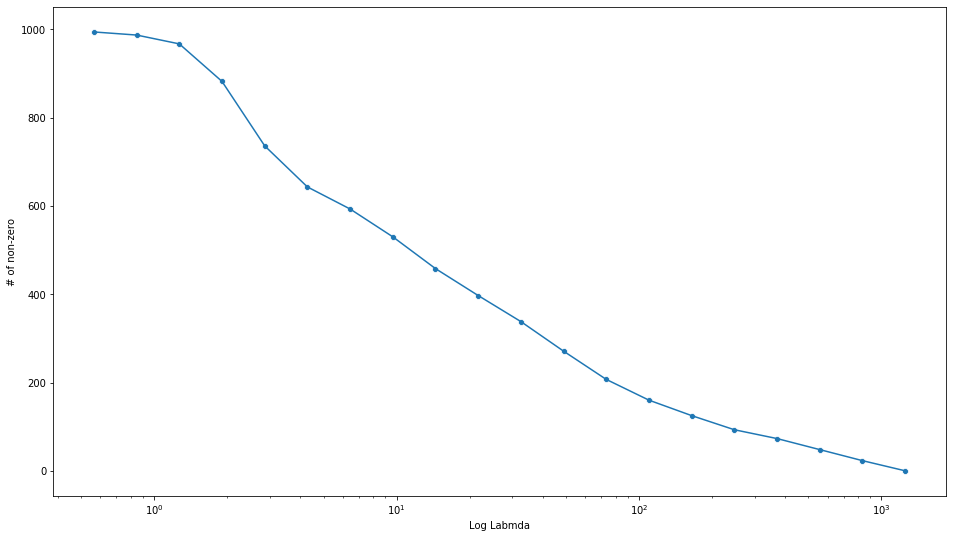

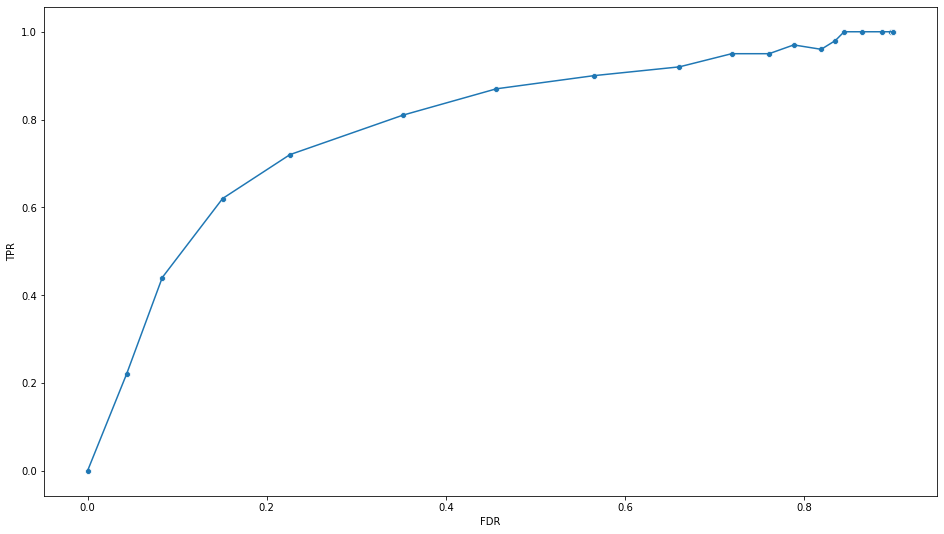

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


def synthetic_data(n = 500, d = 1000, k = 100, sig= 1):
    e = np.random.randn(n)
    w = np.arange(1,k+1)/k
    w_extension = np.array([0]*(d-k))
    w_origin = np.concatenate([w,w_extension],axis = 0)
    x = np.random.randn(n, d)
    y = x.dot(w_origin) + e
    return x,y,w_origin

def lasso_descent(x,y,tolerance = 0.01,L=1):
    diff = 1
    d = x.shape[1]
    n = x.shape[0]
    w = np.zeros(d)
    b = np.sum(y-x.dot(w))/n
    a = np.zeros(d)
    c = np.zeros(d)
    while diff > tolerance:
        w0 = w.copy()
        for k in range(0,d):
            a[k] = 2*np.sum(np.square(x[:,k]))
            w[k]=0
            c[k] = 2*np.sum(x[:,k]*(y-b-x.dot(w)))
            if c[k] < -L:
                w[k] = (c[k]+L)/a[k]
            elif c[k] > L:
                w[k] = (c[k]-L)/a[k]
            else:
                w[k] =0
            #print('w[k]')
            #print(w[k])
        diff = np.max(np.abs(w - w0))
        #print(diff)
    #print('final')
    #print(w)
    return w

def max_L(x,y):
    d = x.shape[1]
    n = x.shape[0]
    l = np.zeros(d)
    for i in range(0,d):
        l[i] = 2*np.abs(x[:,i].T.dot((y-np.mean(y))))
    l_max = np.max(l)
    return l_max

def non_zero(w):
    non_z = w[w!=0]
    return non_z.shape[0]

## A4.a
def plot(x,y):
    l = max_L(x,y)
    d = x.shape[1]
    n = x.shape[0]
    non_z = 0
    k = 100
    l_nonzero = list()
    l_lambda = list()
    FDR = list()
    TPR = list()
    l_nonzero.append(non_z)
    FDR.append(0)
    TPR.append(0)
    l_lambda.append(l)
    while ((d - non_z) >10):
        l = l/1.5
        w = lasso_descent(x,y,tolerance = 0.01,L=l)
        non_z = non_zero(w)
        FDR.append((w[k:] != 0.0).sum()/non_z)
        TPR.append((w[0:k] != 0.0).sum()/k  )
        l_nonzero.append(non_z)
        l_lambda.append(l)
    fig, ax = plt.subplots(figsize=(16,9))
    sns.lineplot(l_lambda, l_nonzero)
    sns.scatterplot(l_lambda, l_nonzero)
    plt.xscale('log')
    ax.set_xlabel("Log Labmda")
    ax.set_ylabel("# of non-zero")
    plt.savefig('./a41.png')
    fig, ax = plt.subplots(figsize=(16,9))
    sns.lineplot(FDR, TPR, ax=ax)
    sns.scatterplot(FDR, TPR, ax=ax)
    ax.set_xlabel("FDR")
    ax.set_ylabel("TPR")
    plt.savefig('./a42.png')


x,y,w_origin = synthetic_data(n = 500, d = 1000, k = 100, sig= 1)
plot(x,y)


In [ ]:
d = x.shape[1]

In [ ]:
d